# Housing Price Predictions

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#prices = pd.read_csv('imputeImpl2_cat_housingData.csv',na_filter = False,index_col=0)
prices = pd.read_csv('data/Ames_Housing_Price_Data.csv',index_col = 0)
estate = pd.read_csv('data/full_wCoord.csv')

In [63]:
prices.reset_index(drop = True, inplace = True)
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PID            2580 non-null   int64  
 1   GrLivArea      2580 non-null   int64  
 2   SalePrice      2580 non-null   int64  
 3   MSSubClass     2580 non-null   int64  
 4   MSZoning       2580 non-null   object 
 5   LotFrontage    2118 non-null   float64
 6   LotArea        2580 non-null   int64  
 7   Street         2580 non-null   object 
 8   Alley          168 non-null    object 
 9   LotShape       2580 non-null   object 
 10  LandContour    2580 non-null   object 
 11  Utilities      2580 non-null   object 
 12  LotConfig      2580 non-null   object 
 13  LandSlope      2580 non-null   object 
 14  Neighborhood   2580 non-null   object 
 15  Condition1     2580 non-null   object 
 16  Condition2     2580 non-null   object 
 17  BldgType       2580 non-null   object 
 18  HouseSty

In [64]:
nulls = prices.isnull().sum(axis = 0)
nulls[nulls>1]


LotFrontage      462
Alley           2412
MasVnrType        14
MasVnrArea        14
BsmtQual          69
BsmtCond          69
BsmtExposure      71
BsmtFinType1      69
BsmtFinType2      70
BsmtFullBath       2
BsmtHalfBath       2
FireplaceQu     1241
GarageType       127
GarageYrBlt      129
GarageFinish     129
GarageQual       129
GarageCond       129
PoolQC          2571
Fence           2055
MiscFeature     2483
dtype: int64

In [65]:
#testing the model w/o the maximum home price
outlier =prices.loc[prices.SalePrice ==184750]
outlier['OverallQual']

309    10
Name: OverallQual, dtype: int64

In [66]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PID            2580 non-null   int64  
 1   GrLivArea      2580 non-null   int64  
 2   SalePrice      2580 non-null   int64  
 3   MSSubClass     2580 non-null   int64  
 4   MSZoning       2580 non-null   object 
 5   LotFrontage    2118 non-null   float64
 6   LotArea        2580 non-null   int64  
 7   Street         2580 non-null   object 
 8   Alley          168 non-null    object 
 9   LotShape       2580 non-null   object 
 10  LandContour    2580 non-null   object 
 11  Utilities      2580 non-null   object 
 12  LotConfig      2580 non-null   object 
 13  LandSlope      2580 non-null   object 
 14  Neighborhood   2580 non-null   object 
 15  Condition1     2580 non-null   object 
 16  Condition2     2580 non-null   object 
 17  BldgType       2580 non-null   object 
 18  HouseSty

In [67]:
#Creating a price per square foot column to help with feature engineering
prices['Price_sqft'] = prices['SalePrice']/prices['GrLivArea']

# Converting quality/condition categoricals to numerical

In [68]:
def ordinal_scale(Series):
        
    '''Returns a pandas Series where quality scores are converted to integers
    
    Args:
    
    Series: a pandas Series of categorical quality scores'''
    return prices[Series].replace({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})

prices['KitchenQual'] = ordinal_scale('KitchenQual')
prices['ExterQual'] = ordinal_scale('ExterQual')
prices['ExterCond'] = ordinal_scale('ExterCond')
prices['HeatingQC'] = ordinal_scale('HeatingQC')

In [69]:
def fillna_ordinals(Series):
    '''
    Returns a pandas series replacing null values with DNE (Does Not Exist) so they can be imputed.
    
    Args:
    

    Series: str, column name in the pandas dataframe.
    '''
    prices[Series].fillna('DNE',inplace = True)
    return prices[Series]
    
impute_cols = ['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
               'BsmtFinType2','FireplaceQu',
               'GarageQual','GarageCond','PoolQC','Fence']

for i in impute_cols:
    prices[i] = fillna_ordinals(i)

prices['GarageType'],prices['GarageFinish'] = fillna_ordinals('GarageType'),fillna_ordinals('GarageFinish')

In [70]:
prices['BsmtQual'].value_counts()

TA     1166
Gd     1077
Ex      188
Fa       78
DNE      69
Po        2
Name: BsmtQual, dtype: int64

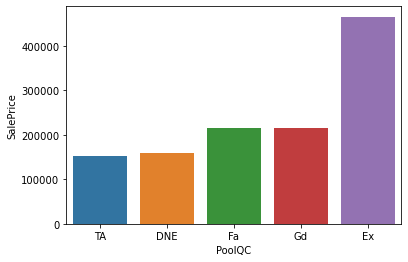

In [71]:
def cat_medians(Series):
    import seaborn as sns
    import matplotlib.pyplot as plt
    bars = prices.groupby(Series)['SalePrice'].median().reset_index().sort_values(by = 'SalePrice')
    sns.barplot(data = bars, x = Series,y = 'SalePrice')

    
cat_medians('PoolQC')

In [72]:
for i in impute_cols:
    prices[i].replace({'Po':0,'DNE':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},inplace = True)

In [73]:
# def impute_ordinals(Series):
#     '''
#     Returns a pandas series containing null values and converting to numerical, ordered by median price per sqft.
    
#     Args:
    

#     Series: str, column name in the pandas dataframe.
#     '''
#     prices[Series].fillna('DNE',inplace = True)
#     ords = prices.groupby(Series)['Price_sqft'].median().sort_values().reset_index()
#     ords = list(ords[Series])
#     impute = dict()
#     for i, j in enumerate(ords):
#         impute[j] = i
#     prices[Series].replace(impute, inplace = True)
#     return prices[Series]


In [74]:
# impute_cols = ['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
#                'BsmtFinType2','FireplaceQu','GarageType','GarageFinish',
#                'GarageQual','GarageCond','PoolQC','Fence']

# impute_cols = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
#                'BsmtFinType2','FireplaceQu','GarageType','GarageFinish',
#                'GarageQual','GarageCond','PoolQC','Fence']
# for i in impute_cols:
#     prices[i] = impute_ordinals(i)

In [75]:
prices['Utilities'].value_counts()

AllPub    2578
NoSewr       2
Name: Utilities, dtype: int64

In [76]:
prices['MiscFeature'].fillna(0,inplace = True)
prices['MiscFeature'] = prices['MiscFeature'].apply(lambda M: 1 if M !=0 else M)
prices['CentralAir'].replace({'N':0,'Y':1},inplace = True)
prices['Street'].replace({'Grvl':1,'Pave':0},inplace = True)
prices['PavedDrive'].replace({'Y':1,'P':0.5,'N':0},inplace = True)
prices['Utilities'].replace({'AllPub':4, 'NoSewr':3, 'NoSeWa':2, 'ELO':1},inplace = True)

In [77]:
nulls = prices.isnull().sum(axis = 0)
nulls[nulls>1]

LotFrontage     462
MasVnrType       14
MasVnrArea       14
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt     129
dtype: int64

In [245]:
new_prices = prices.copy()
new_prices = new_prices.loc[~new_prices['Neighborhood'].isin(['Landmrk','Greens','GrnHill'])]

In [79]:
def check_frontage(boro):
    x = prices['LotFrontage'].loc[prices['Neighborhood']==boro]
    return plt.hist(x)

(array([ 2.,  3.,  8., 30., 15., 14.,  9.,  5.,  2.,  2.]),
 array([ 40.,  48.,  56.,  64.,  72.,  80.,  88.,  96., 104., 112., 120.]),
 <BarContainer object of 10 artists>)

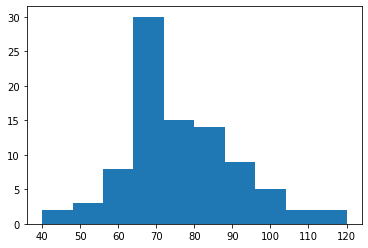

In [80]:
check_frontage('Sawyer')

## Reducing to numeric features

In [81]:
'MasVnrType','Electrical'

('MasVnrType', 'Electrical')

In [247]:
#impute lot frontage based off the mean of the respective neighborhood
def impute_by_neighborhood(Series):
    return new_prices[Series].fillna(new_prices.groupby('Neighborhood')[Series].transform('mean'))

In [248]:
new_prices['LotFrontage'] = impute_by_neighborhood('LotFrontage')
new_prices['GarageYrBlt'] = impute_by_neighborhood('GarageYrBlt')

<AxesSubplot:xlabel='Neighborhood', ylabel='GarageYrBlt'>

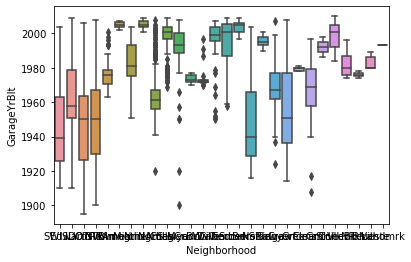

In [249]:
prices.groupby('Neighborhood')['GarageCars'].mean()
sns.boxplot(data = prices, x = 'Neighborhood', y = 'GarageYrBlt')

# Selecting numerical variables for multiple linear regression

In [85]:
# categorical_features = new_prices.select_dtypes(include = object)
# for i in categorical_features:
#     categorical_features[i].fillna(categorical_features[i].mode()[0], inplace=True)

# categorical_features = pd.get_dummies(categorical_features)
numeric_features = new_prices.select_dtypes(include = np.number)

# numeric_features =pd.concat([categorical_features, numeric_features], axis=1)


# imputing remaining numerical features with the mean
numeric_features_filled = numeric_features.fillna(numeric_features.mean())
#numeric_features_filled = numeric_features.copy()
y_price = np.log(numeric_features_filled['SalePrice'])
numeric_features_filled.drop(['PID','SalePrice','Price_sqft','MSSubClass'], axis = 1, inplace = True)



# OHE categorical values to numerical

In [86]:
# print(len(categorical_features.columns))
# categorical_features.columns

In [87]:
#prices = pd.get_dummies(prices,columns=['GarageFinish','SaleCondition'])



# from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder(handle_unknown='ignore')
# ohe.fit_transform(categorical_features['GarageFinish'].astype(str))

In [88]:
numeric_features_filled.columns

Index(['GrLivArea', 'LotFrontage', 'LotArea', 'Street', 'Utilities',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'MiscFeature', 'MiscVal', 'MoSold',
       'YrSold'],
      dtype='object')

In [89]:
#categorical_features['GarageType'].value_counts()

<AxesSubplot:>

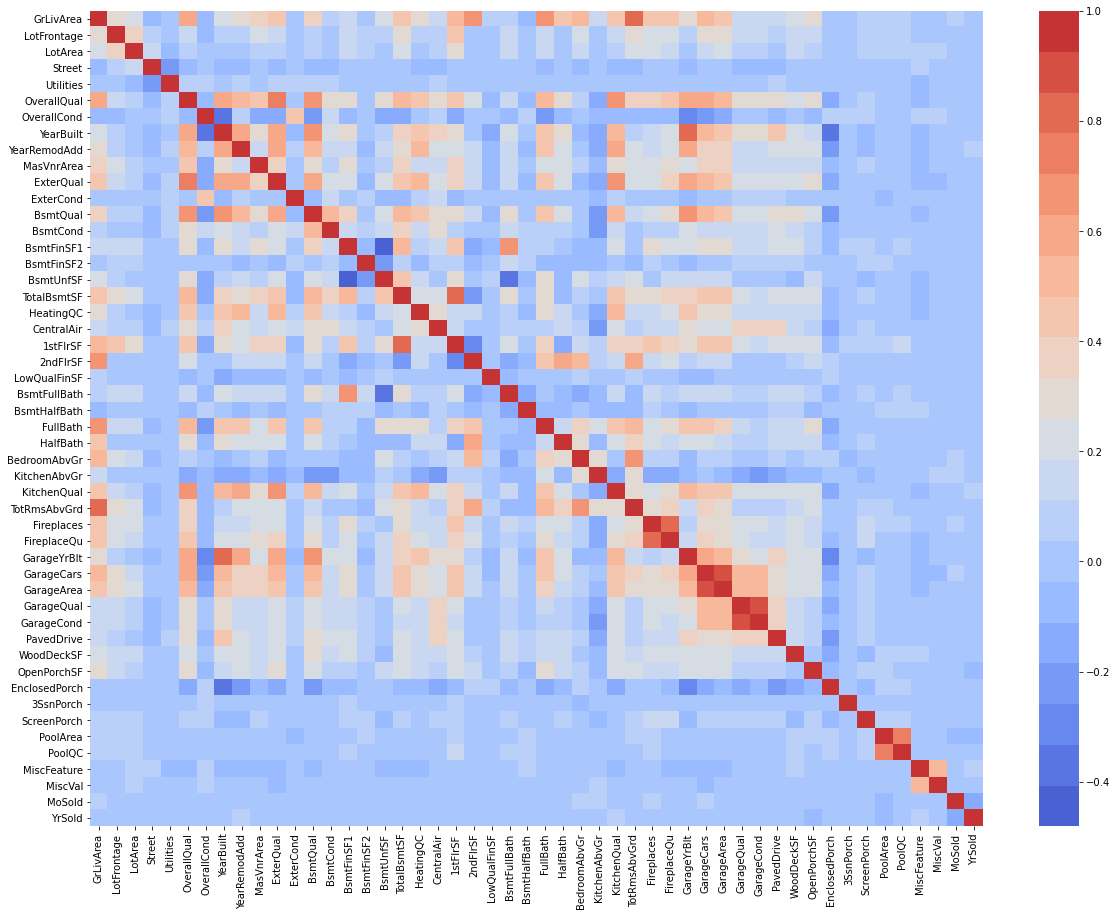

In [90]:
plt.figure(figsize = (20,15))
colormap = sns.color_palette('coolwarm',20)
sns.heatmap(numeric_features_filled.corr(),cmap = colormap)

In [91]:
r_prices = new_prices.corr()
r_prices = r_prices[['SalePrice']][1:]

<AxesSubplot:>

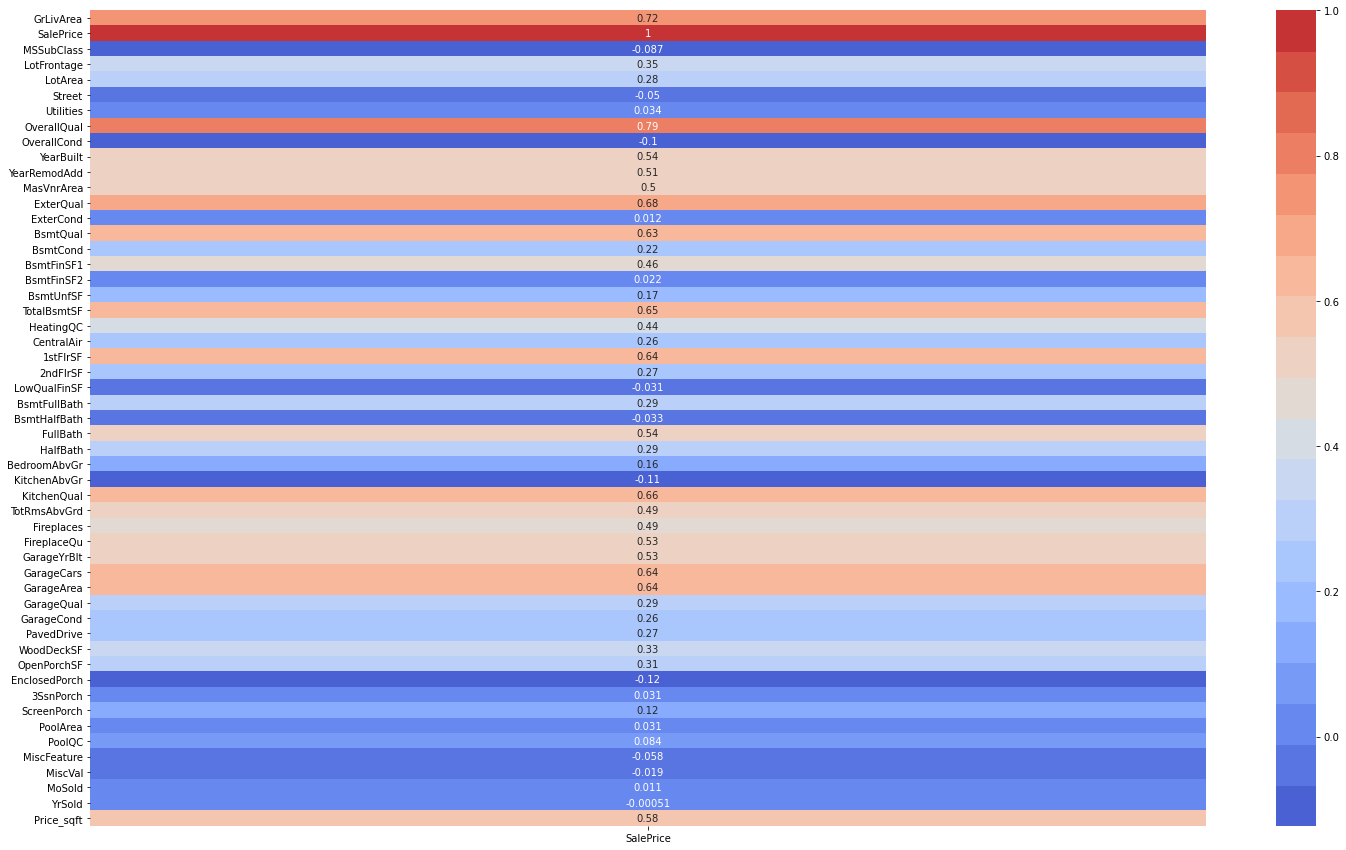

In [92]:
plt.figure(figsize = (25,15))
sns.heatmap(r_prices,annot = True,cmap = colormap)

In [93]:
numeric_features_filled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2569 entries, 0 to 2579
Data columns (total 50 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   GrLivArea      2569 non-null   int64  
 1   LotFrontage    2569 non-null   float64
 2   LotArea        2569 non-null   int64  
 3   Street         2569 non-null   int64  
 4   Utilities      2569 non-null   int64  
 5   OverallQual    2569 non-null   int64  
 6   OverallCond    2569 non-null   int64  
 7   YearBuilt      2569 non-null   int64  
 8   YearRemodAdd   2569 non-null   int64  
 9   MasVnrArea     2569 non-null   float64
 10  ExterQual      2569 non-null   int64  
 11  ExterCond      2569 non-null   int64  
 12  BsmtQual       2569 non-null   int64  
 13  BsmtCond       2569 non-null   int64  
 14  BsmtFinSF1     2569 non-null   float64
 15  BsmtFinSF2     2569 non-null   float64
 16  BsmtUnfSF      2569 non-null   float64
 17  TotalBsmtSF    2569 non-null   float64
 18  HeatingQ

# Distribution of numerical variables

In [94]:
numeric_colnames = numeric_features_filled.columns
len(numeric_colnames)

50

Median is 159900.0
Mean is 178059.62325581396


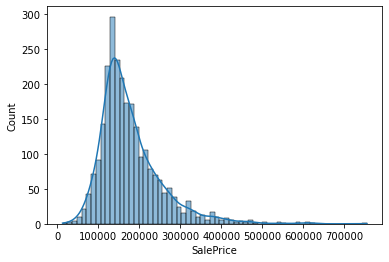

In [95]:
sns.histplot(new_prices.SalePrice,kde = True)
print(f'Median is {np.median(prices.SalePrice)}')
print(f'Mean is {np.mean(prices.SalePrice)}')

Text(0.5, 1.0, 'Distribution of numerical variables')

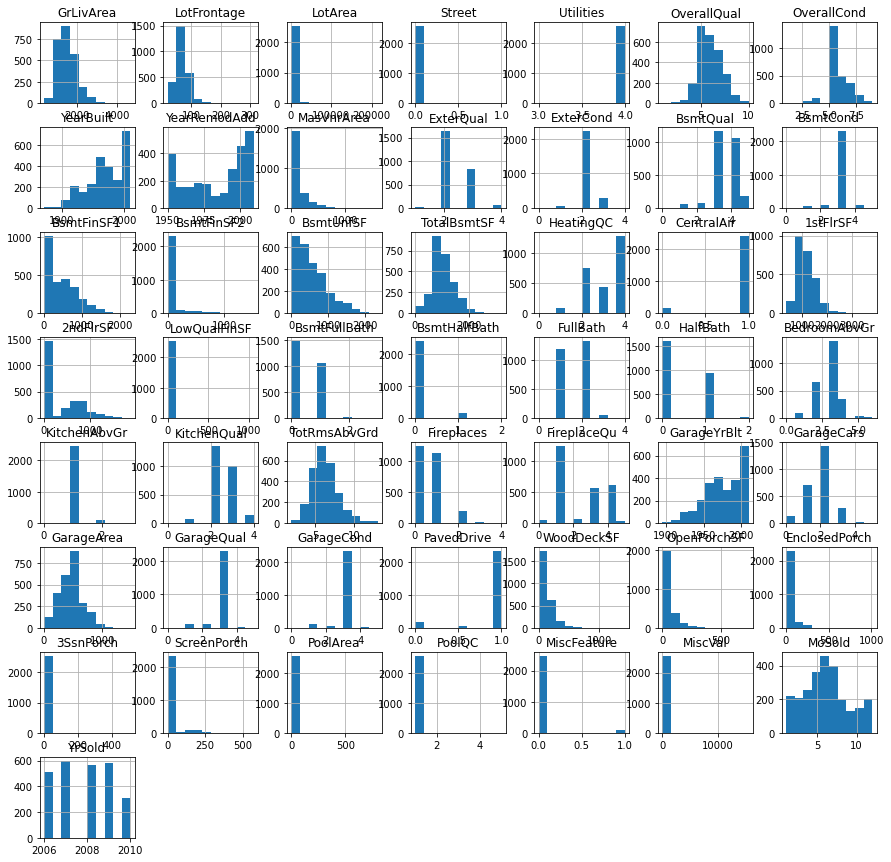

In [96]:
numeric_features_filled.hist(figsize = (15,15))
plt.title('Distribution of numerical variables')

### Five fold CV using KFold

<p> Gabi says drop garagecars, garagequal and garagecondition</p>

In [97]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import Lasso


Xtrain,Xtest,ytrain,ytest = train_test_split(numeric_features_filled,y_price)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
cv = KFold(n_splits = 5, shuffle = True)


from sklearn.linear_model import Lasso
lasso = Lasso(max_iter = 3500000)

from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
# pipe = Pipeline(steps = [('ss',StandardScaler()),('lasso',lasso)])

alphas = np.linspace(.00001,0.02,1000)

cv_res=[]

for alpha in alphas:
    lasso.set_params(alpha = alpha)
    pipe = Pipeline(steps = [('ss',StandardScaler()),('lasso',lasso)])
    cv_res.append(cross_validate(pipe, Xtrain,ytrain,cv = cv, return_train_score = True))

In [98]:
lasso_test = [i['test_score'].mean() for i in cv_res]
lasso_train = [i['train_score'].mean() for i in cv_res]

Text(0, 0.5, 'Coefficient of Determination')

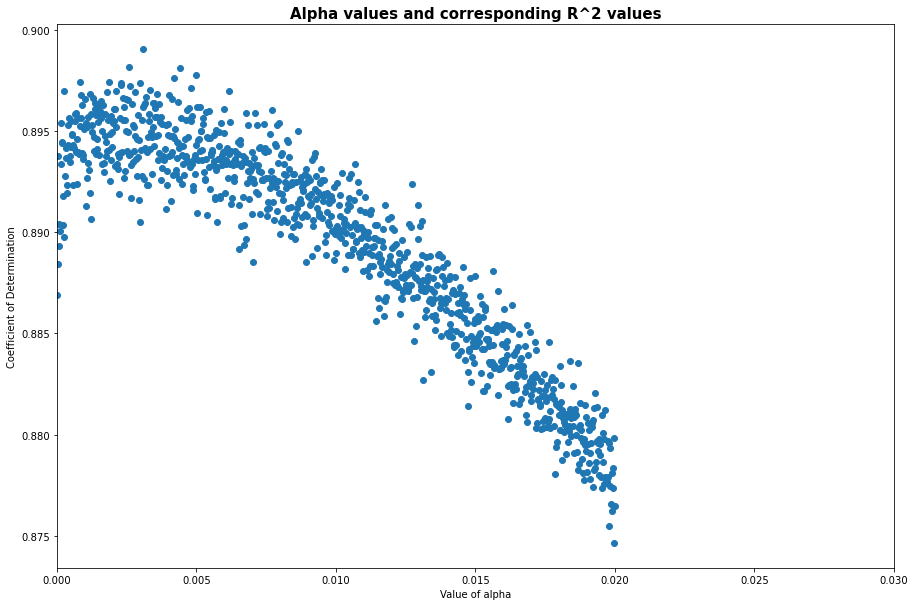

In [99]:
plt.figure(figsize = (15,10))
plt.scatter(alphas, lasso_test)
plt.xlim([0,0.03])
plt.title(r'Alpha values and corresponding R^2 values',fontsize = 15, fontweight = 'bold')
plt.xlabel('Value of alpha')
plt.ylabel('Coefficient of Determination')

In [100]:
alpha_ind = lasso_test.index(max(lasso_test))
f'alpha: {alphas[alpha_ind]}, train_score: {lasso_train[alpha_ind]}, test_score: {lasso_test[alpha_ind]}'

'alpha: 0.003091541541541542, train_score: 0.9025526477834349, test_score: 0.8990561250428529'

In [101]:
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)
lasso = Lasso()
lasso.set_params(alpha = alphas[alpha_ind])
lasso.fit(Xtrain,ytrain)

lasso_train_results = lasso.score(Xtrain,ytrain)
lasso_test_results = lasso.score(Xtest,ytest)
print(lasso_train_results)
print(lasso_test_results)

0.9016065478629821
0.9105035478970561


In [102]:
from sklearn.linear_model import LinearRegression
ols = LinearRegression()

ols.fit(Xtrain,ytrain)

print(f'MLR training score: {ols.score(Xtrain,ytrain)}')
print(f'MLR testing score: {ols.score(Xtest,ytest)}')

from sklearn.metrics import mean_squared_error
y_pred = ols.predict(Xtest)
RMSE = mean_squared_error(ytest,y_pred,squared = False)
print(f'RMSE: {RMSE}')

MLR training score: 0.9030691172957819
MLR testing score: 0.9123494537084216
RMSE: 0.11953159240933472


In [103]:
coefs = lasso.coef_
zero_idx = np.where(coefs == 0)
numeric_features_filled.columns[zero_idx]

Index(['MasVnrArea', 'ExterCond', 'BsmtUnfSF', '2ndFlrSF', 'BsmtHalfBath',
       'HalfBath', 'BedroomAbvGr', 'GarageQual', 'OpenPorchSF', 'PoolArea',
       'PoolQC', 'MiscFeature', 'MiscVal', 'MoSold'],
      dtype='object')

In [104]:
for col, coef in zip(numeric_features_filled.columns[zero_idx], lasso.coef_):
    print(f'{col}:   {coef}')

MasVnrArea:   0.11304098074566218
ExterCond:   0.02038461247741132
BsmtUnfSF:   0.01935301199544194
2ndFlrSF:   -0.0019591162030195915
BsmtHalfBath:   0.0014373113645371753
HalfBath:   0.09122834616444532
BedroomAbvGr:   0.0455425717943845
GarageQual:   0.053434680994951404
OpenPorchSF:   0.007728193919901596
PoolArea:   0.0
PoolQC:   0.015381943580624982
MiscFeature:   0.0
MiscVal:   0.015890150747232074
MoSold:   0.0015124571051325774


# Drop Features Post-lasso

In [105]:
post_lasso = numeric_features_filled.drop(numeric_features_filled.columns[zero_idx],axis = 1)

In [106]:
print(len(post_lasso.columns))

print(len(numeric_features_filled.columns))

36
50


In [107]:
Xtrain,Xtest,ytrain,ytest = train_test_split(post_lasso,y_price)

Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)


ols2 = LinearRegression()
ols2.fit(Xtrain,ytrain)

LinearRegression()

In [108]:
print(f'Post-lasso training score: {ols2.score(Xtrain,ytrain)}')
print(f'Post-lasso testing score: {ols2.score(Xtest,ytest)}')

y_pred = ols2.predict(Xtest)
RMSE = mean_squared_error(ytest,y_pred,squared=False)
print(f'Post-lasso RMSE: {RMSE}')

Post-lasso training score: 0.900720554249796
Post-lasso testing score: 0.9190157910060327
Post-lasso RMSE: 0.10906942107289351


In [109]:
pipe = Pipeline(steps = [('ss',StandardScaler()),('ols',LinearRegression())])
cv_res2 =cross_validate(pipe, post_lasso,y_price ,cv = cv, return_train_score = True)

In [110]:
print(f"Testing score: {cv_res2['test_score'].mean()}")
print(f"Training score: {cv_res2['train_score'].mean()}")

Testing score: 0.9005710163869187
Training score: 0.9062282384071016


In [111]:
cv_res2

{'fit_time': array([0.01270175, 0.00819874, 0.00806904, 0.00699592, 0.00706816]),
 'score_time': array([0.00220919, 0.00219226, 0.00217605, 0.00222111, 0.00386095]),
 'test_score': array([0.91940237, 0.91169805, 0.89021717, 0.91722227, 0.86431523]),
 'train_score': array([0.90133109, 0.90388443, 0.90880258, 0.90263792, 0.91448518])}

In [112]:
from yellowbrick.regressor import ResidualsPlot
ols2 = LinearRegression()
visualizer = ResidualsPlot(ols2)
visualizer.fit(Xtrain, ytrain) 
visualizer.score(Xtest, ytest)  
visualizer.show() 

ModuleNotFoundError: No module named 'yellowbrick'

## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gBoost = GradientBoostingRegressor()

from sklearn.model_selection import GridSearchCV
# search_grid={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1],'max_depth':[1,2,4],'subsample':[.5,.75,1],'random_state':[1]}
# search=GridSearchCV(estimator=gBoost,param_grid=search_grid,n_jobs=1,cv=cv)
# search.fit(Xtrain,ytrain)

# search.best_params_

In [ ]:
# gBoost.set_params()
gBoost.fit(Xtrain,ytrain)
print(gBoost.score(Xtrain,ytrain))
print(gBoost.score(Xtest,ytest))

y_pred = gBoost.predict(Xtest)
RMSE = mean_squared_error(ytest,y_pred,squared = False)
print(f'Gradient Boosting RMSE: {RMSE}')

<p>After selecting features with lasso, Linear regression R2 was .91, while a default GradientBoostingRegressor yielded .905</p>

# Descriptive Model

In [ ]:
for col, coef in zip(post_lasso.columns, ols2.coef_):
    print(f'{col}:   {coef}')

In [ ]:
plt.figure(figsize = (15,10))
plt.plot(list(range(len(post_lasso.columns))),ols2.coef_)
plt.xticks(list(range(len(post_lasso.columns))),labels = post_lasso.columns, rotation = 90)
plt.title('Standardized feature betas in log(SalePrice) linear model', fontsize = 15, fontweight = 'bold')

<p>Most influential features in the linear model are GrLivArea, OverallQual, OverallCond, and YearBuilt</p>

In [ ]:
from math import exp
test = sc.transform(post_lasso.iloc[8].values.reshape(-1,len(post_lasso.columns)))
137500 - exp(ols2.predict(test))

In [ ]:
res = []
obs = list(map(exp, ytest))
exp = list(map(exp,y_pred))
for i in range(len(obs)):
    res.append(abs(obs[i]-exp[i]))

In [ ]:
print(f'Average predicted price was off by ${np.mean(res)}')
print(f'Closest prediction to actual price was ${np.min(res)}')
print(f'Furthest prediction to actual price was ${np.max(res)}')

In [ ]:
estate_data = estate[['PID','SalePrice','coord','dist_stadium','dist_downtown','dist_airport']]
geo_price_data = pd.merge(prices, estate_data, on = ['PID','SalePrice'],how = 'inner')

In [ ]:
new = geo_price_data["coord"].str.replace('(', '').str.replace(')', '').str.split(",", n = 1, expand = True)
geo_price_data['latitude']= new[0]
geo_price_data['longitude']= new[1]

geo_price_data['latitude'] = pd.to_numeric(geo_price_data['latitude'])
geo_price_data['longitude'] = pd.to_numeric(geo_price_data['longitude'])

# Random forest

In [250]:
new_prices.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

In [251]:
new_prices

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Price_sqft
0,909176150,856,126000,30,RL,58.769231,7890,0,1,Reg,...,0,1,1,0,0,3,2010,WD,Normal,147.196262
1,905476230,1049,139500,120,RL,42.000000,4235,0,1,Reg,...,0,1,1,0,0,2,2009,WD,Normal,132.983794
2,911128020,1001,124900,30,C (all),60.000000,6060,0,1,Reg,...,0,1,1,0,0,11,2007,WD,Normal,124.775225
3,535377150,1039,114000,70,RL,80.000000,8146,0,1,Reg,...,0,1,1,0,0,5,2009,WD,Normal,109.720885
4,534177230,1665,227000,60,RL,70.000000,8400,0,1,Reg,...,0,1,1,0,0,11,2009,WD,Normal,136.336336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,903205040,952,121000,30,RL,55.945652,8854,0,1,Reg,...,0,1,1,0,0,5,2009,WD,Normal,127.100840
2576,905402060,1733,139600,20,RL,65.490066,13680,0,1,IR1,...,0,1,1,0,0,6,2009,WD,Normal,80.553953
2577,909275030,2002,145000,90,RH,82.000000,6270,0,1,Reg,...,0,1,1,0,0,8,2007,WD,Normal,72.427572
2578,907192040,1842,217500,60,RL,69.978947,8826,0,1,Reg,...,0,1,1,0,0,7,2007,WD,Normal,118.078176


In [252]:
new_prices.drop_duplicates(subset= None, keep='first', inplace=True, ignore_index=False)

In [253]:
new_prices.shape

(2568, 82)

In [254]:
latlon = pd.read_csv('data/full_latlon.csv')
latlon.head()

,PID,lat,lon,dist_stadium,dist_downtown,dist_airport,coord
0,526301100,42.053808,-93.618344,4.417461,3.210441,6.102121,"(42.053808, -93.618344)"
1,526302030,42.053668,-93.618459,4.399660,3.196132,6.086080,"(42.053668, -93.618459)"
2,526302040,42.053578,-93.618276,4.395200,3.184448,6.076963,"(42.05357834520508, -93.61827582597934)"
3,526302110,42.052841,-93.618633,4.308096,3.106740,5.993553,"(42.05284062808919, -93.61863289727206)"
4,526302120,42.052853,-93.618678,4.308129,3.108530,5.994682,"(42.05285252734815, -93.61867770937495)"


In [255]:
full_prices = new_prices.copy()
full_prices = pd.merge(new_prices, latlon, how='inner', left_on = 'PID', right_on = 'PID' )
full_prices.drop(columns = 'coord', inplace = True)

In [256]:
full_prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2615 entries, 0 to 2614
Data columns (total 87 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PID            2615 non-null   int64  
 1   GrLivArea      2615 non-null   int64  
 2   SalePrice      2615 non-null   int64  
 3   MSSubClass     2615 non-null   int64  
 4   MSZoning       2615 non-null   object 
 5   LotFrontage    2615 non-null   float64
 6   LotArea        2615 non-null   int64  
 7   Street         2615 non-null   int64  
 8   Alley          2615 non-null   object 
 9   LotShape       2615 non-null   object 
 10  LandContour    2615 non-null   object 
 11  Utilities      2615 non-null   int64  
 12  LotConfig      2615 non-null   object 
 13  LandSlope      2615 non-null   object 
 14  Neighborhood   2615 non-null   object 
 15  Condition1     2615 non-null   object 
 16  Condition2     2615 non-null   object 
 17  BldgType       2615 non-null   object 
 18  HouseSty

This is essentially the flowchart for random forest that works well:
Impute all missing values. For categoricals, the mode, for numericals, the mean/median based on distribution.
    Split data frame into categorical columns and numerical columns.
    from sklearn.preprocessing import LabelEncoder
    use LabelEncoder on the categorical data
    Use standardScaler on the numerical data
    Concatenate the categorical and numerical data back together
    Run the randomforest

In [225]:
categ = full_prices.select_dtypes(object).columns
categ

Index(['MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'Foundation', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'Electrical', 'Functional', 'GarageType',
       'GarageFinish', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')

In [234]:
numer = full_prices.select_dtypes(include = ['float64', 'int64']).columns

numer = numer.drop("PID")

numer

Index(['GrLivArea', 'SalePrice', 'MSSubClass', 'LotFrontage', 'LotArea',
       'Street', 'Utilities', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'Price_sqft', 'lat',
       'lon', 'dist_stadium', 'dist_downtown', 'dist_airport'],
      dtype='object')

In [163]:
from sklearn.preprocessing import LabelEncoder

In [164]:
labelencoder = LabelEncoder()


In [208]:
categ_df = pd.DataFrame()

for col in categ:
    full_prices[col] = full_prices[col].astype(str)
    categ_df[col]= labelencoder.fit_transform(full_prices[col])
    
categ_df

,MSZoning,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,BsmtFinType1,BsmtFinType2,Heating,Electrical,Functional,GarageType,GarageFinish,Fence,SaleType,SaleCondition
0,5,0,3,3,0,0,18,2,2,0,...,5,6,1,3,6,6,3,0,9,4
1,5,0,3,3,4,0,7,2,2,4,...,3,1,1,3,6,1,1,0,9,4
2,5,0,3,3,4,0,7,2,2,4,...,3,1,1,3,6,1,1,0,9,4
3,1,0,3,3,4,0,9,2,2,0,...,1,6,1,3,6,6,3,0,9,4
4,5,0,3,3,0,0,17,2,2,0,...,6,6,1,3,6,6,3,0,9,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2614,5,0,3,3,4,0,3,2,2,0,...,6,6,3,1,6,6,3,0,9,4
2615,5,0,0,3,1,0,7,2,2,0,...,0,0,1,0,3,1,3,0,9,4
2616,4,0,3,1,4,0,6,2,2,2,...,2,6,1,0,6,0,3,0,9,4
2617,5,0,3,3,4,0,5,2,2,0,...,3,6,1,3,6,1,1,0,9,4


In [176]:
full_prices[['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'Foundation', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'SaleType',
       'SaleCondition']]

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,Electrical,Functional,GarageType,GarageFinish,SaleType,SaleCondition
0,RL,Reg,Lvl,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,...,No,Rec,Unf,GasA,SBrkr,Typ,Detchd,Unf,WD,Normal
1,RL,Reg,Lvl,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,...,Mn,GLQ,ALQ,GasA,SBrkr,Typ,Attchd,Fin,WD,Normal
2,RL,Reg,Lvl,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,...,Mn,GLQ,ALQ,GasA,SBrkr,Typ,Attchd,Fin,WD,Normal
3,C (all),Reg,Lvl,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,...,No,ALQ,Unf,GasA,SBrkr,Typ,Detchd,Unf,WD,Normal
4,RL,Reg,Lvl,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,...,No,Unf,Unf,GasA,SBrkr,Typ,Detchd,Unf,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2614,RL,Reg,Lvl,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,...,No,Unf,Unf,Grav,FuseF,Typ,Detchd,Unf,WD,Normal
2615,RL,IR1,Lvl,CulDSac,Gtl,Edwards,Norm,Norm,1Fam,1Story,...,1,1,1,GasA,FuseA,Min2,Attchd,Unf,WD,Normal
2616,RH,Reg,HLS,Inside,Gtl,Crawfor,Norm,Norm,Duplex,2Story,...,No,BLQ,Unf,GasA,FuseA,Typ,2Types,Unf,WD,Normal
2617,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,No,GLQ,Unf,GasA,SBrkr,Typ,Attchd,Fin,WD,Normal


In [221]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()



In [239]:
numer_df = pd.DataFrame(full_prices[numer])

X = sc.fit_transform(numer_df)
    
X


array([[-1.28541684, -0.6838038 , -0.64274879, ..., -1.77807034,
        -0.18905608, -1.06086902],
       [-0.89066169, -0.5055984 ,  1.45504014, ..., -0.77841987,
         0.35182919, -0.29297948],
       [-0.89066169, -0.5055984 ,  1.45504014, ..., -0.77841987,
         0.35182919, -0.29297948],
       ...,
       [ 1.05856971, -0.4329962 ,  0.75577717, ..., -2.24357736,
        -0.58363722, -1.25717255],
       [ 0.73131155,  0.52403281,  0.05651419, ...,  0.91305632,
         1.66848809,  0.62779554],
       [ 0.87244163,  0.49103181,  0.05651419, ...,  0.68802644,
         1.28722133,  0.76607833]])

In [240]:
X_columns = numer_df.columns

In [241]:
scaled_numer_df = pd.DataFrame(X, columns=X_columns)
scaled_numer_df 

,GrLivArea,SalePrice,MSSubClass,LotFrontage,LotArea,Street,Utilities,OverallQual,OverallCond,YearBuilt,...,MiscFeature,MiscVal,MoSold,YrSold,Price_sqft,lat,lon,dist_stadium,dist_downtown,dist_airport
0,-1.285417,-0.683804,-0.642749,NaN,-0.275659,-0.064945,0.027645,-0.022541,0.339019,-1.049758,...,-0.197164,-0.097293,-1.174285,1.645386,0.866597,-0.863707,-0.351531,-1.778070,-0.189056,-1.060869
1,-0.890662,-0.505598,1.455040,-1.160859,-0.728126,-0.064945,0.027645,-0.751365,-0.553334,0.464423,...,-0.197164,-0.097293,-1.548746,0.884300,0.400970,-0.517039,-0.816048,-0.778420,0.351829,-0.292979
2,-0.890662,-0.505598,1.455040,-1.160859,-0.728126,-0.064945,0.027645,-0.751365,-0.553334,0.464423,...,-0.197164,-0.097293,-1.548746,0.884300,0.400970,-0.517039,-0.816048,-0.778420,0.351829,-0.292979
3,-0.988839,-0.698324,-0.642749,-0.371902,-0.502202,-0.064945,0.027645,-0.751365,3.016080,-1.352594,...,-0.197164,-0.097293,1.821407,-0.637870,0.132043,-0.699317,1.095813,-1.310738,-1.855725,-1.476689
4,-0.911115,-0.842209,0.289602,0.504716,-0.243968,-0.064945,0.027645,-1.480188,2.123726,-2.362048,...,-0.197164,-0.097293,-0.425362,0.884300,-0.361165,0.173789,1.167548,-0.309195,-1.278820,-0.368158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2614,-1.089062,-0.749806,-0.642749,NaN,-0.156322,-0.064945,0.027645,-0.022541,0.339019,-1.823673,...,-0.197164,-0.097293,-0.425362,0.884300,0.208234,-0.117709,0.621547,-1.276577,-1.321654,-0.783029
2615,0.508367,-0.504278,-0.875836,NaN,0.441108,-0.064945,0.027645,-2.209012,-0.553334,-0.511382,...,-0.197164,-0.097293,-0.050900,0.884300,-1.316728,-0.361970,-0.911140,-0.506701,0.478044,-0.065691
2616,1.058570,-0.432996,0.755777,0.592378,-0.476205,-0.064945,0.027645,-0.751365,0.339019,-0.713273,...,-0.197164,-0.097293,0.698022,-0.637870,-1.582963,-0.777492,-0.051387,-2.243577,-0.583637,-1.257173
2617,0.731312,0.524033,0.056514,NaN,-0.159788,-0.064945,0.027645,0.706283,-0.553334,1.002799,...,-0.197164,-0.097293,0.323561,-0.637870,-0.087365,-0.960830,-1.821158,0.913056,1.668488,0.627796
